In [270]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import pandas as pd
import datetime as dt
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate
from datetime import date 
import seaborn as sns


In [271]:
spy = yf.Ticker('SPY')
SNP_df = spy.funds_data

SNP_df = spy.history(period="max")

SNP_df.parse_dates = True

SNP_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.626124,24.626124,24.503606,24.608622,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,24.626130,24.783653,24.626130,24.783653,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,24.766135,24.853648,24.713627,24.836145,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,24.871170,25.116206,24.853667,25.098703,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.186200,25.256211,24.906159,25.203703,531500,0.0,0.0,0.0


In [272]:
#Rename Columns: Sometimes, column names may contain extra spaces or unexpected characters. You can rename columns to ensure consistency:

SNP_df.columns = SNP_df.columns.str.strip()

#keep only the Close column
SNP_df = SNP_df[['Close']]
SNP_df.head()


,Close
Date,
1993-01-29 00:00:00-05:00,24.608622
1993-02-01 00:00:00-05:00,24.783653
1993-02-02 00:00:00-05:00,24.836145
1993-02-03 00:00:00-05:00,25.098703
1993-02-04 00:00:00-05:00,25.203703


In [273]:

#set the index to the date column
#Sort the index to ensure it is in ascending order and parse the date


SNP_df = SNP_df.sort_index()

SNP_df.index = pd.to_datetime(SNP_df.index)
SNP_df.head()




,Close
Date,
1993-01-29 00:00:00-05:00,24.608622
1993-02-01 00:00:00-05:00,24.783653
1993-02-02 00:00:00-05:00,24.836145
1993-02-03 00:00:00-05:00,25.098703
1993-02-04 00:00:00-05:00,25.203703


In [274]:
#resample the data to get the average price for each month
SNP_monthly_df = SNP_df.resample('MS').mean()
SNP_monthly_df.head()

,Close
Date,
1993-01-01 00:00:00-05:00,24.608622
1993-02-01 00:00:00-05:00,24.806675
1993-03-01 00:00:00-05:00,25.317268
1993-04-01 00:00:00-05:00,24.960989
1993-05-01 00:00:00-04:00,25.132823


In [275]:
#Rename Close column to SNP_Close
SNP_monthly_df = SNP_monthly_df.rename(columns={"Close": "SNP_Close"})

SNP_monthly_df.head()

,SNP_Close
Date,
1993-01-01 00:00:00-05:00,24.608622
1993-02-01 00:00:00-05:00,24.806675
1993-03-01 00:00:00-05:00,25.317268
1993-04-01 00:00:00-05:00,24.960989
1993-05-01 00:00:00-04:00,25.132823


In [276]:
#remove the time from the index
SNP_monthly_df.index = SNP_monthly_df.index.date

#name the index column Date
SNP_monthly_df.index.name = 'Date'
SNP_monthly_df.head()

,SNP_Close
Date,
1993-01-01,24.608622
1993-02-01,24.806675
1993-03-01,25.317268
1993-04-01,24.960989
1993-05-01,25.132823


In [277]:
#parse the date column
SNP_monthly_df.index = pd.to_datetime(SNP_monthly_df.index)
SNP_monthly_df

,SNP_Close
Date,
1993-01-01,24.608622
1993-02-01,24.806675
1993-03-01,25.317268
1993-04-01,24.960989
1993-05-01,25.132823
...,...
2024-07-01,550.330164
2024-08-01,544.880518
2024-09-01,559.835788


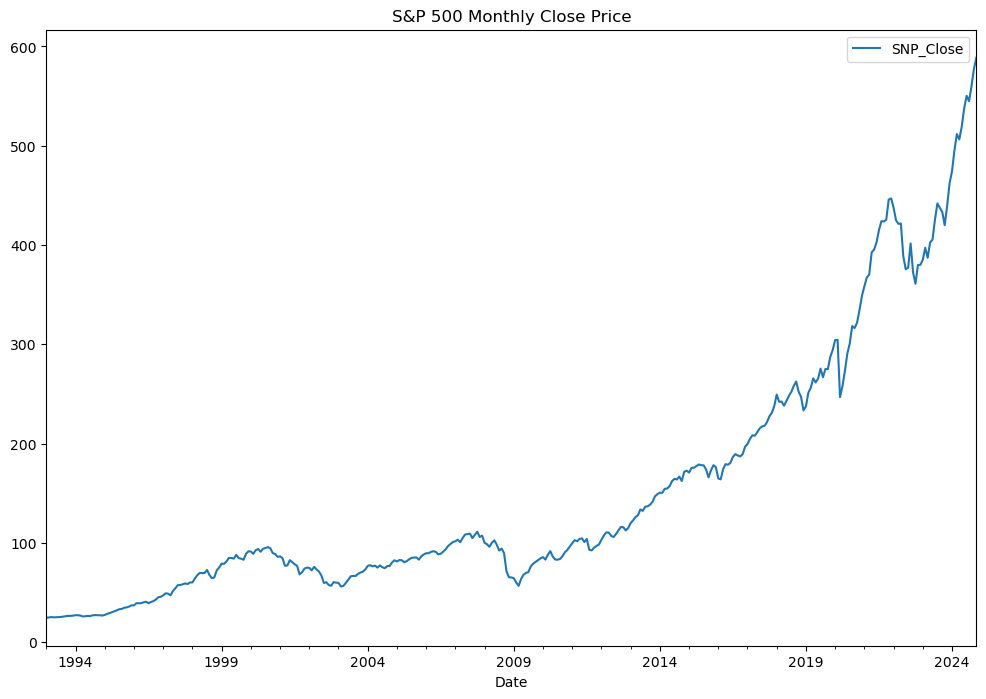

In [278]:
SNP_monthly_df.plot(figsize=(12, 8), title="S&P 500 Monthly Close Price")

#save the plot
plt.savefig("./graphs/SNP_monthly.png")

In [279]:
#read fedfunds data
Fedfunds_df = pd.read_csv("./Resources/FEDFUNDS.csv")

#set the date as the index
Fedfunds_df.set_index('DATE', inplace=True)

#parese the date
Fedfunds_df.parse_dates = True
Fedfunds_df.index = pd.to_datetime(Fedfunds_df.index)
Fedfunds_df.head()

Fedfunds_df.head()

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


In [280]:
#Rename DATE columen to Date
Fedfunds_df.index.names = ['Date']

#Rename Column Name FEDFUNDS to FedRate
Fedfunds_df.columns = ['FedRate']



In [281]:
#resample the data to get the average price for each month
Fedfunds_monthly_df = Fedfunds_df.resample('MS').mean()
Fedfunds_monthly_df

,FedRate
Date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2024-06-01,5.33
2024-07-01,5.33
2024-08-01,5.33


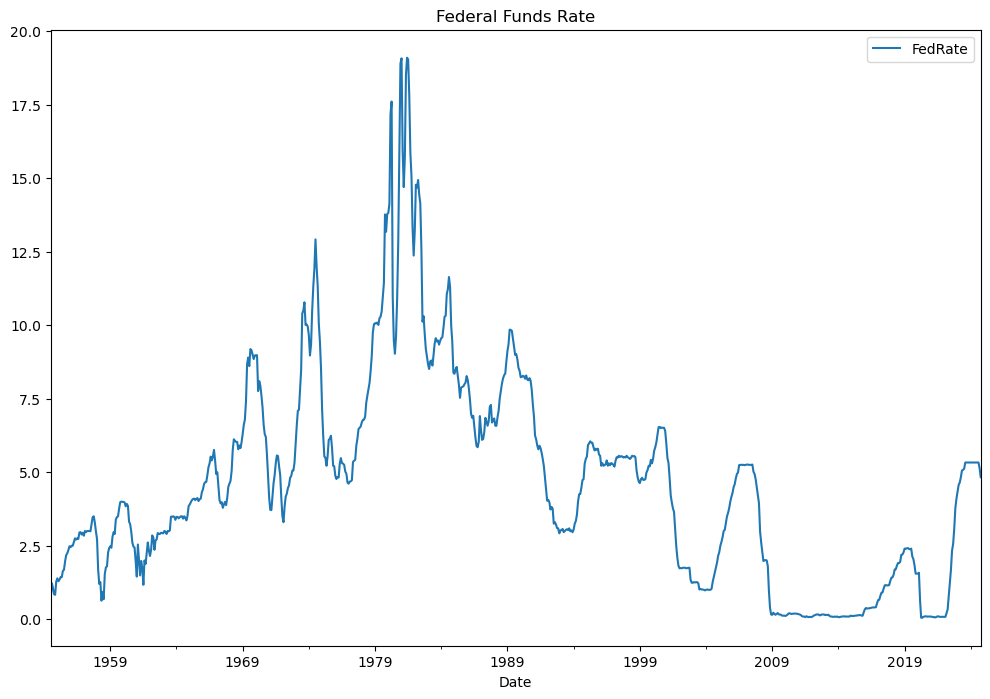

In [282]:
#plot the data
Fedfunds_monthly_df.plot(figsize=(12, 8), title="Federal Funds Rate")

#save the plot
plt.savefig("./graphs/FedFundsRate.png")

In [283]:
Unemployment_df = pd.read_csv("./Resources/US-monthly-unemployment.csv")
Unemployment_df.head()

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Unemployment Rate,1948-01-31T00:00:00,3.4,Monthly,USURTOT,2012-02-23T11:41:00
1,United States,Unemployment Rate,1948-02-29T00:00:00,3.8,Monthly,USURTOT,2012-02-23T11:41:00
2,United States,Unemployment Rate,1948-03-31T00:00:00,4.0,Monthly,USURTOT,2012-02-23T11:41:00
3,United States,Unemployment Rate,1948-04-30T00:00:00,3.9,Monthly,USURTOT,2012-02-23T11:41:00
4,United States,Unemployment Rate,1948-05-31T00:00:00,3.5,Monthly,USURTOT,2012-02-23T11:41:00


In [284]:
#set the date as the index
Unemployment_df.set_index('DateTime', inplace=True)

#parese the date
Unemployment_df.parse_dates = True
Unemployment_df.index = pd.to_datetime(Unemployment_df.index)

#Rename Datetime columen to Date
Unemployment_df.index.names = ['Date']


Unemployment_df.head()


,Country,Category,Value,Frequency,HistoricalDataSymbol,LastUpdate
Date,,,,,,
1948-01-31,United States,Unemployment Rate,3.4,Monthly,USURTOT,2012-02-23T11:41:00
1948-02-29,United States,Unemployment Rate,3.8,Monthly,USURTOT,2012-02-23T11:41:00
1948-03-31,United States,Unemployment Rate,4.0,Monthly,USURTOT,2012-02-23T11:41:00
1948-04-30,United States,Unemployment Rate,3.9,Monthly,USURTOT,2012-02-23T11:41:00
1948-05-31,United States,Unemployment Rate,3.5,Monthly,USURTOT,2012-02-23T11:41:00


In [285]:
#keep only the value and index columns
Unemployment_df = Unemployment_df[['Value']]

#rename the column to UnemploymentRate
Unemployment_df.columns = ['UnemploymentRate']

Unemployment_df.head()

,UnemploymentRate
Date,
1948-01-31,3.4
1948-02-29,3.8
1948-03-31,4.0
1948-04-30,3.9
1948-05-31,3.5


In [286]:
#Rename the Lebal colume as Date and sort the index
Unemployment_df = Unemployment_df.sort_index()
Unemployment_df.head()

,UnemploymentRate
Date,
1948-01-31,3.4
1948-02-29,3.8
1948-03-31,4.0
1948-04-30,3.9
1948-05-31,3.5


In [287]:
#resample the data to get the average unemployment rate for each month
Unemployment_monhtly_df = Unemployment_df.resample('MS').mean()
Unemployment_monhtly_df

,UnemploymentRate
Date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-06-01,4.1
2024-07-01,4.3
2024-08-01,4.2


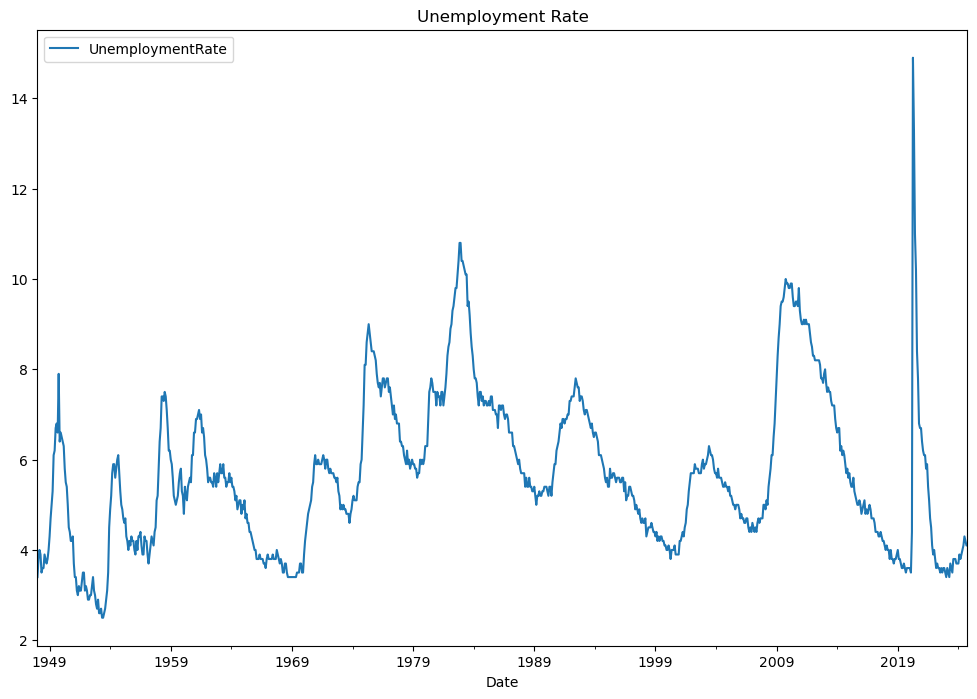

In [288]:
#drop na values
Unemployment_monhtly_df.dropna()

#plot the data
Unemployment_df.plot(figsize=(12, 8), title="Unemployment Rate")

#save the plot
plt.savefig("./graphs/UnemploymentRate.png")

In [289]:
#use yahoo finance to get treasury rate data
#define ticker symbol
ticker_symbol = "^TNX"

#use yfinance to get the data
Treasuries10Y_df = yf.Ticker(ticker_symbol)

Treasuries10Y_df = Treasuries10Y_df.history(period="max")

#parse the date
Treasuries10Y_df.parse_dates = True

Treasuries10Y_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-06:00,4.06,4.06,4.06,4.06,0,0.0,0.0
1962-01-03 00:00:00-06:00,4.03,4.03,4.03,4.03,0,0.0,0.0
1962-01-04 00:00:00-06:00,3.99,3.99,3.99,3.99,0,0.0,0.0
1962-01-05 00:00:00-06:00,4.02,4.02,4.02,4.02,0,0.0,0.0
1962-01-08 00:00:00-06:00,4.03,4.03,4.03,4.03,0,0.0,0.0


In [290]:
#set Date column as the index and sort the index
Treasuries10Y_df = Treasuries10Y_df.sort_index()

#keep only the Clode column and rename it to 10YTrate
Treasuries10Y_df = Treasuries10Y_df[['Close']]
Treasuries10Y_df.columns = ['10YTrate']


Treasuries10Y_df.head()

,10YTrate
Date,
1962-01-02 00:00:00-06:00,4.06
1962-01-03 00:00:00-06:00,4.03
1962-01-04 00:00:00-06:00,3.99
1962-01-05 00:00:00-06:00,4.02
1962-01-08 00:00:00-06:00,4.03


In [291]:
#remove the date on date time and convert to datetime
Treasuries10Y_df.index = Treasuries10Y_df.index.date
Treasuries10Y_df.index = pd.to_datetime(Treasuries10Y_df.index)
Treasuries10Y_df.head()

,10YTrate
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [292]:
#drop any missing values
Treasuries10Y_df = Treasuries10Y_df.dropna()

#rename the index column to Date
Treasuries10Y_df.index.name = 'Date'

#parse the date
Treasuries10Y_df.index = pd.to_datetime(Treasuries10Y_df.index)


In [293]:
#resample the data to monthly
Treasuries10Y_monhtly_df = Treasuries10Y_df.resample('MS').mean()
Treasuries10Y_monhtly_df.head()

,10YTrate
Date,
1962-01-01,4.083182
1962-02-01,4.039445
1962-03-01,3.930455
1962-04-01,3.843000
1962-05-01,3.873636


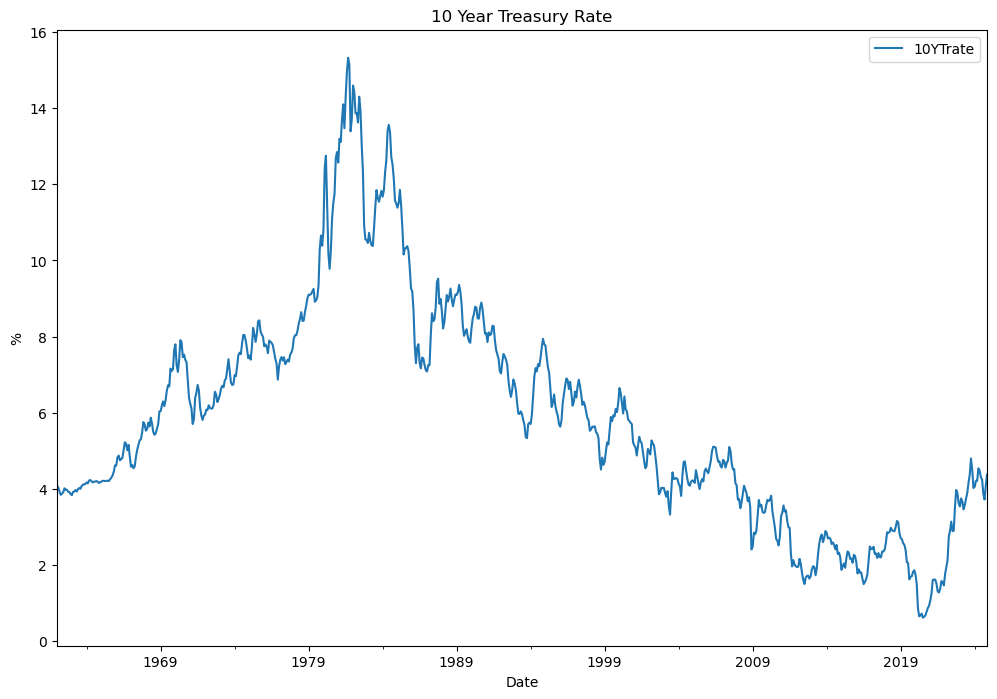

In [294]:
#plot the data
Treasuries10Y_monhtly_df.plot(figsize=(12, 8), title="10 Year Treasury Rate")

#set the y axis as percentage
plt.ylabel('%')


#save the plot
plt.savefig("./graphs/10YTreasuryRate.png")

In [295]:
# Define the ticker symbol for gold futures
ticker = 'GC=F'

# Fetch historical data
Gold_df = yf.Ticker(ticker)

Gold_df = Gold_df.history(period="max")

#parse the date
Gold_df.parse_dates = True

Gold_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,0,0.0,0.0
2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,0,0.0,0.0
2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,0,0.0,0.0
2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,2,0.0,0.0
2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,0,0.0,0.0


In [296]:
#sort the index
#keep only close column and rename to GoldPrice
#remove the time from the date
#rename the index column as Date
#parse the date

Gold_df = Gold_df.sort_index()
Gold_df = Gold_df[['Close']]
Gold_df.columns = ['GoldPrice']
Gold_df.index = Gold_df.index.date
Gold_df.index.name = 'Date'
Gold_df.index = pd.to_datetime(Gold_df.index)



Gold_df.head()


,GoldPrice
Date,
2000-08-30,273.899994
2000-08-31,278.299988
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012


In [297]:
#resample the data to get the average price for each month
Gold_monthly_df = Gold_df.resample('MS').mean()

#drop any missing values
Gold_monthly_df = Gold_monthly_df.dropna()

Gold_monthly_df.head()

,GoldPrice
Date,
2000-08-01,276.099991
2000-09-01,273.389996
2000-10-01,269.809090
2000-11-01,265.874997
2000-12-01,271.515005


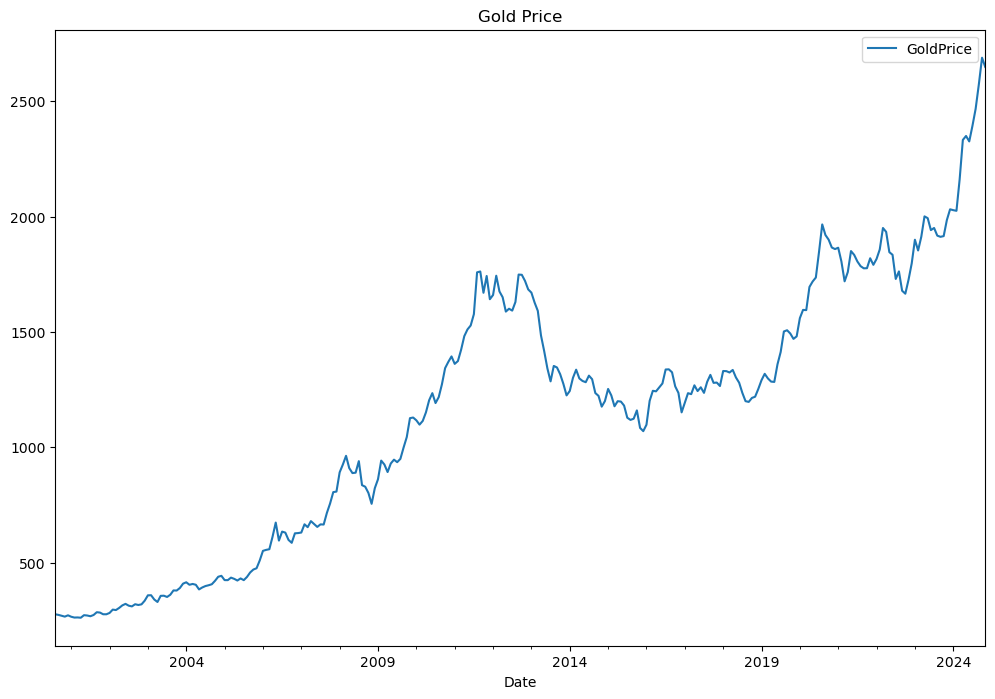

In [298]:
#plot the data
Gold_monthly_df.plot(figsize=(12, 8), title="Gold Price")
#save the plot
plt.savefig("./graphs/GoldPrice.png")

In [299]:
#read in the inflation file
Inflation_df = pd.read_csv("./Resources/US Inflation.csv")

#set the date as the inde
Inflation_df.set_index('DateTime', inplace=True)

#parse the date
Inflation_df.index = pd.to_datetime(Inflation_df.index)

#rename the column Close to InflationRate
Inflation_df = Inflation_df.rename(columns={'Value':'InflationRate'})

#rename  the Datetime column to Date
Inflation_df.index.names = ['Date']


Inflation_df.head()


,Country,Category,InflationRate,Frequency,HistoricalDataSymbol,LastUpdate
Date,,,,,,
1957-02-28,United States,Core Inflation Rate,0.4,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-03-31,United States,Core Inflation Rate,0.3,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-04-30,United States,Core Inflation Rate,0.3,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-05-31,United States,Core Inflation Rate,0.0,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-06-30,United States,Core Inflation Rate,0.3,Monthly,USACORECPIRATE,2012-10-02T14:16:00


In [300]:
#set the date to year-month-day format
Inflation_df.index = pd.to_datetime(Inflation_df.index)

#shift the date to the first of the month
    
def shift_to_first_of_month(given_date):
    return given_date.replace(day=1)

#use shift_to_first_of_month function to shift the date to the first of the month
Inflation_df.index = Inflation_df.index.map(shift_to_first_of_month)

#Inflation_df = Inflation_df.resample('MS').mean()
#Inflation_df.index = Inflation_df.index.to_period('M').to_timestamp('M')

#sort the index
Inflation_df = Inflation_df.sort_index()
Inflation_df.head()

,Country,Category,InflationRate,Frequency,HistoricalDataSymbol,LastUpdate
Date,,,,,,
1957-02-01,United States,Core Inflation Rate,0.4,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-03-01,United States,Core Inflation Rate,0.3,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-04-01,United States,Core Inflation Rate,0.3,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-05-01,United States,Core Inflation Rate,0.0,Monthly,USACORECPIRATE,2012-10-02T14:16:00
1957-06-01,United States,Core Inflation Rate,0.3,Monthly,USACORECPIRATE,2012-10-02T14:16:00


In [301]:
#keep only the InflationRate column
Inflation_monthly_df = Inflation_df[['InflationRate']]
Inflation_monhtly_df.head()

,InflationRate
Date,
1957-02-01,0.4
1957-03-01,0.3
1957-04-01,0.3
1957-05-01,0.0
1957-06-01,0.3


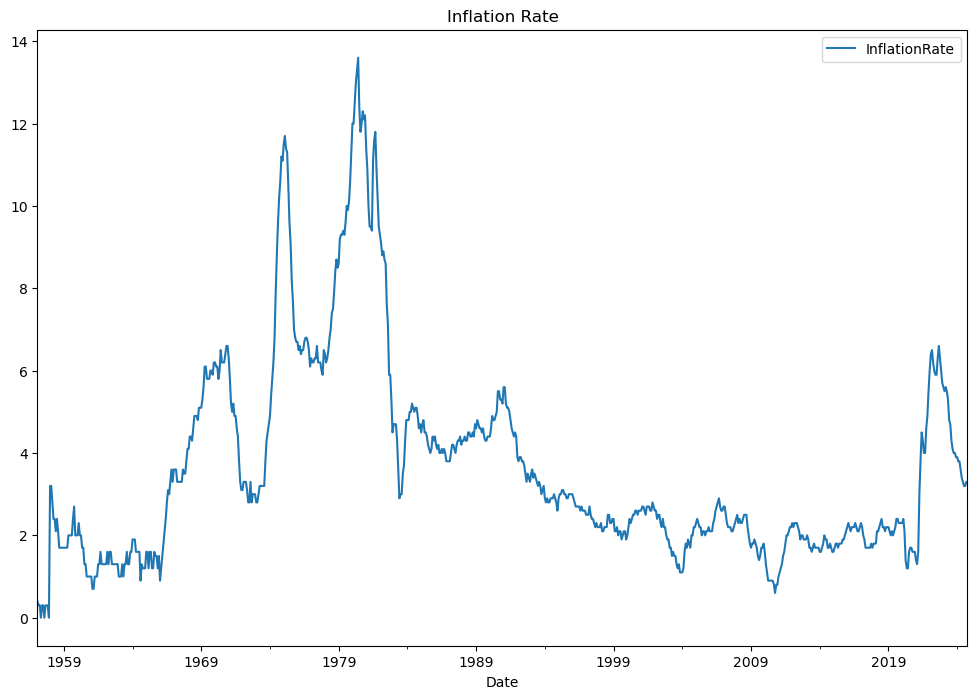

In [302]:
#plot the data
Inflation_monthly_df.plot(figsize=(12, 8), title="Inflation Rate")

#save the plot
plt.savefig("./graphs/InflationRate.png")

In [303]:
#import CCI data
CCI_df = pd.read_csv("./Resources/CCI_US.csv", parse_dates=True, index_col='Date')
CCI_df

,CCI
Date,
1967-02-01,134.3
1967-04-01,140.7
1967-06-01,134.0
1967-08-01,130.1
1967-10-01,134.5
...,...
2024-06-01,97.8
2024-07-01,101.9
2024-08-01,105.6


In [304]:
#convert the date to year month day format
CCI_df.index = pd.to_datetime(CCI_df.index)


In [305]:
#sort the index
CCI_df = CCI_df.sort_index()

CCI_df

,CCI
Date,
1967-02-01,134.3
1967-04-01,140.7
1967-06-01,134.0
1967-08-01,130.1
1967-10-01,134.5
...,...
2024-06-01,97.8
2024-07-01,101.9
2024-08-01,105.6


In [306]:
#resample the data to get the average CCI for each month
CCI_monthly_df = CCI_df.resample('MS').mean()
CCI_monthly_df

,CCI
Date,
1967-02-01,134.3
1967-03-01,NaN
1967-04-01,140.7
1967-05-01,NaN
1967-06-01,134.0
...,...
2024-06-01,97.8
2024-07-01,101.9
2024-08-01,105.6


In [307]:
#drop any missing values
CCI_monthly_df = CCI_monthly_df.dropna()
CCI_monthly_df

,CCI
Date,
1967-02-01,134.3
1967-04-01,140.7
1967-06-01,134.0
1967-08-01,130.1
1967-10-01,134.5
...,...
2024-06-01,97.8
2024-07-01,101.9
2024-08-01,105.6


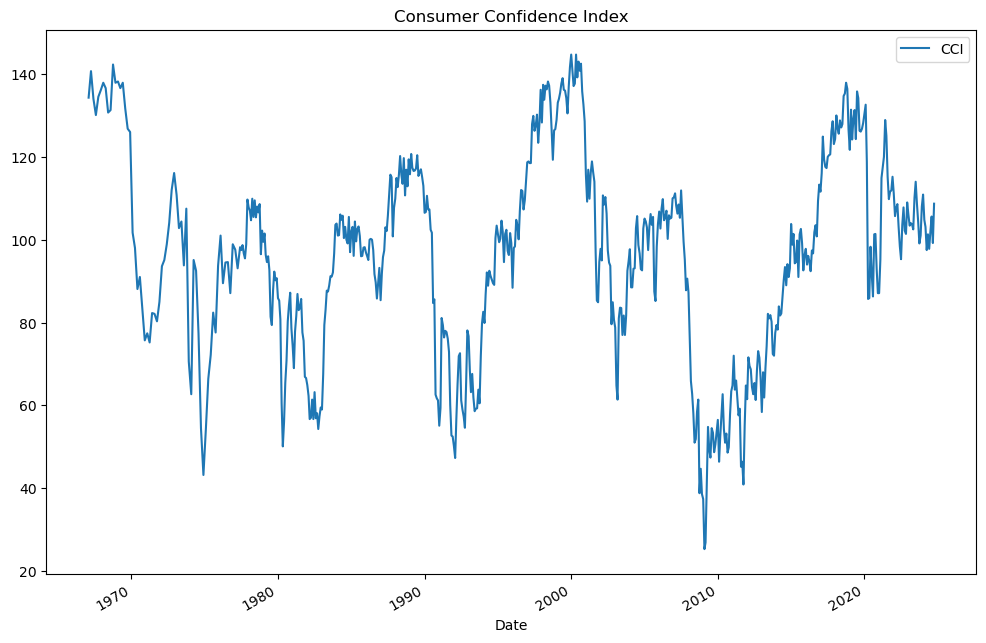

In [308]:
#plot the data
CCI_monthly_df.plot(figsize=(12, 8), title="Consumer Confidence Index")

#save the plot
plt.savefig("./graphs/CCI.png")


In [309]:
#import the yield curve data
YieldCurve_df = pd.read_csv("./Resources/T10Y2Y.csv", parse_dates=True, index_col='DATE')

YieldCurve_df.head()

,T10Y2Y
DATE,
1980-02-01,-0.75
1980-02-04,-0.72
1980-02-05,-0.76
1980-02-06,-0.50
1980-02-07,-0.50


In [370]:
#set Date as datetime
YieldCurve_df.index = pd.to_datetime(YieldCurve_df.index)

#rename the column to YieldCurve
YieldCurve_df.columns = ['YieldCurve']

YieldCurve_df.index.names = ['Date']



In [371]:
# Convert the YieldCurve column to numeric, forcing errors to NaN
YieldCurve_df['YieldCurve'] = pd.to_numeric(YieldCurve_df['YieldCurve'], errors='coerce')

# Resample the data to get the average yield curve for each month
YieldCurve_monthly_df = YieldCurve_df.resample('MS').mean()
YieldCurve_monthly_df

,YieldCurve
Date,
1980-02-01,-1.003684
1980-03-01,-2.135714
1980-04-01,-1.028571
1980-05-01,0.731429
1980-06-01,1.050000
...,...
2024-07-01,-0.247273
2024-08-01,-0.094545
2024-09-01,0.101000


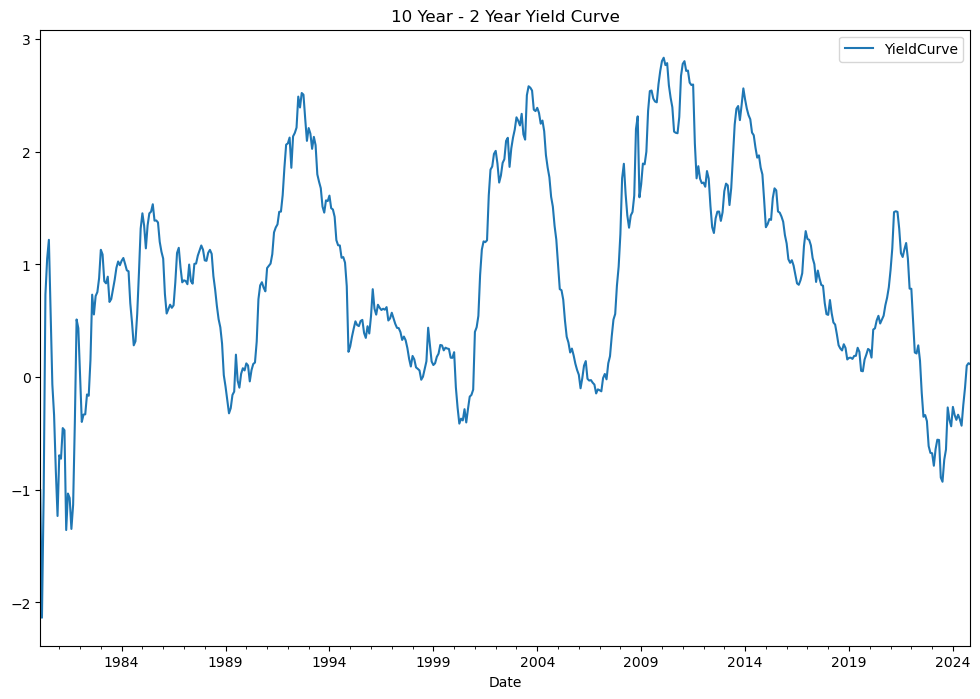

In [372]:
#drop na values
#rename DATE column to date
YieldCurve_monthly_df = YieldCurve_monthly_df.dropna()



#plot the data
YieldCurve_monthly_df.plot(figsize=(12, 8), title="10 Year - 2 Year Yield Curve")

#save the plot
plt.savefig("./graphs/YieldCurve.png")

In [313]:
#conatinating all the dataframes
economic_data_df = pd.concat([SNP_monthly_df, Gold_monthly_df, YieldCurve_monthly_df, CCI_monthly_df, 
                              Unemployment_monhtly_df, Inflation_monthly_df, Fedfunds_monthly_df], axis=1, join='inner')

economic_data_df.head()
#export the data to a csv file
#economic_data_df.to_csv('./Resources/economic_data.csv')


,SNP_Close,GoldPrice,YieldCurve,CCI,UnemploymentRate,InflationRate,FedRate
2000-08-01,95.726556,276.099991,-0.402609,140.8,4.1,2.6,6.50
2000-09-01,94.546395,273.389996,-0.282500,142.5,3.9,2.6,6.52
2000-10-01,89.679685,269.809090,-0.173810,135.8,3.9,2.5,6.51
2000-11-01,88.764642,265.874997,-0.158095,132.6,3.9,2.6,6.51
2000-12-01,85.883223,271.515005,-0.111500,128.6,3.9,2.6,6.40


In [314]:
#export the data to a csv file
economic_data_df.to_csv('./Resources/economic_data.csv')

In [315]:
#correration matrix
correlation_matrix = economic_data_df.corr()
correlation_matrix

,SNP_Close,GoldPrice,YieldCurve,CCI,UnemploymentRate,InflationRate,FedRate
SNP_Close,1.000000,0.799553,-0.590868,0.440995,-0.411317,0.650111,0.161221
GoldPrice,0.799553,1.000000,-0.275759,0.001738,0.051313,0.377282,-0.196523
YieldCurve,-0.590868,-0.275759,1.000000,-0.674930,0.676498,-0.596059,-0.713458
CCI,0.440995,0.001738,-0.674930,1.000000,-0.776316,0.342288,0.451341
UnemploymentRate,-0.411317,0.051313,0.676498,-0.776316,1.000000,-0.537584,-0.581678
InflationRate,0.650111,0.377282,-0.596059,0.342288,-0.537584,1.000000,0.371714
FedRate,0.161221,-0.196523,-0.713458,0.451341,-0.581678,0.371714,1.000000


In [316]:
plt.savefig("correclation_matrix.png")  # Save the graph

<Figure size 640x480 with 0 Axes>

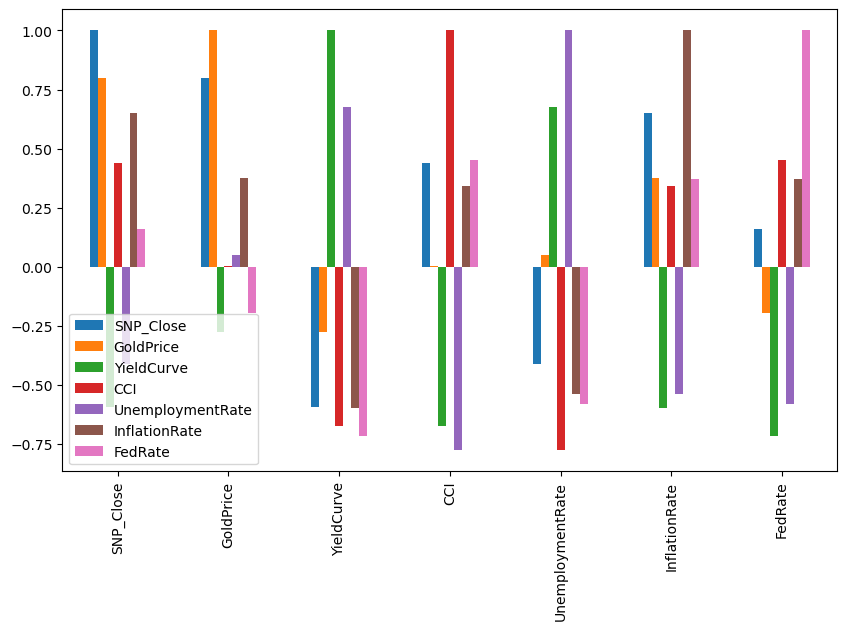

In [317]:
Plot = correlation_matrix.plot(kind='bar', figsize=(10, 6))

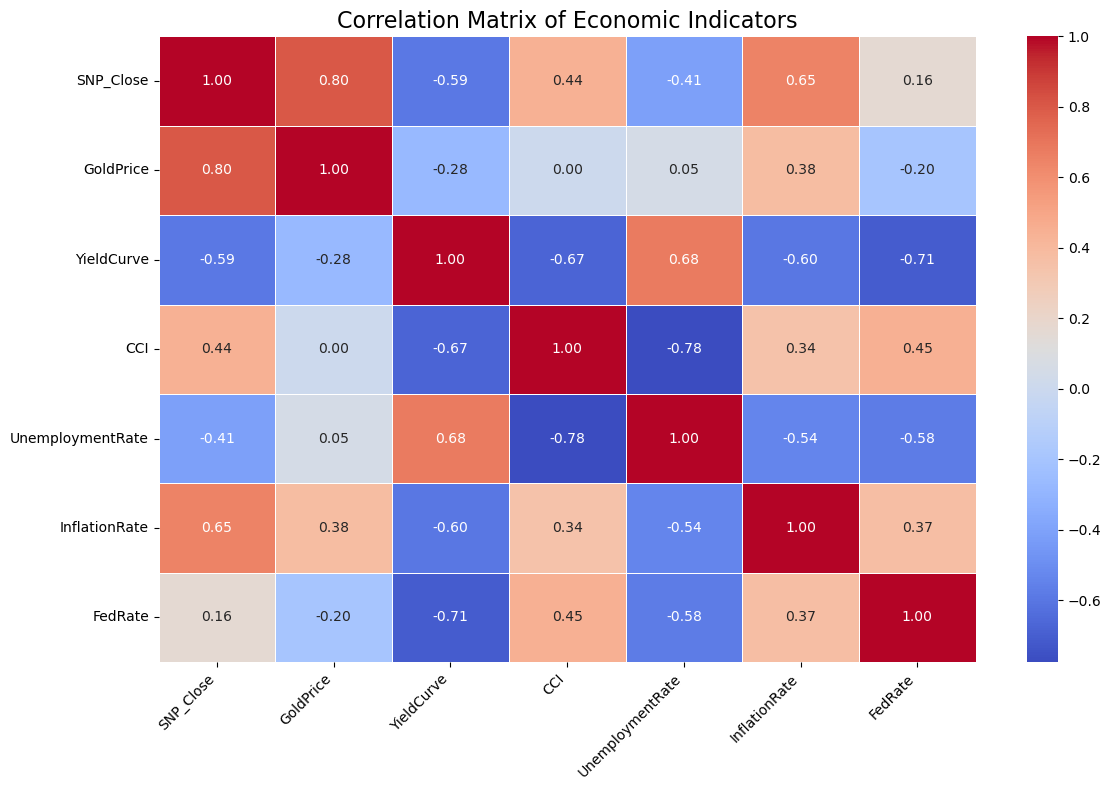

In [318]:
#Correlation matrix plot
correlation_matrix = economic_data_df.corr()
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Economic Indicators', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.savefig("./graphs/correlation_matrix.png")  # Save the plot as png
plt.show()

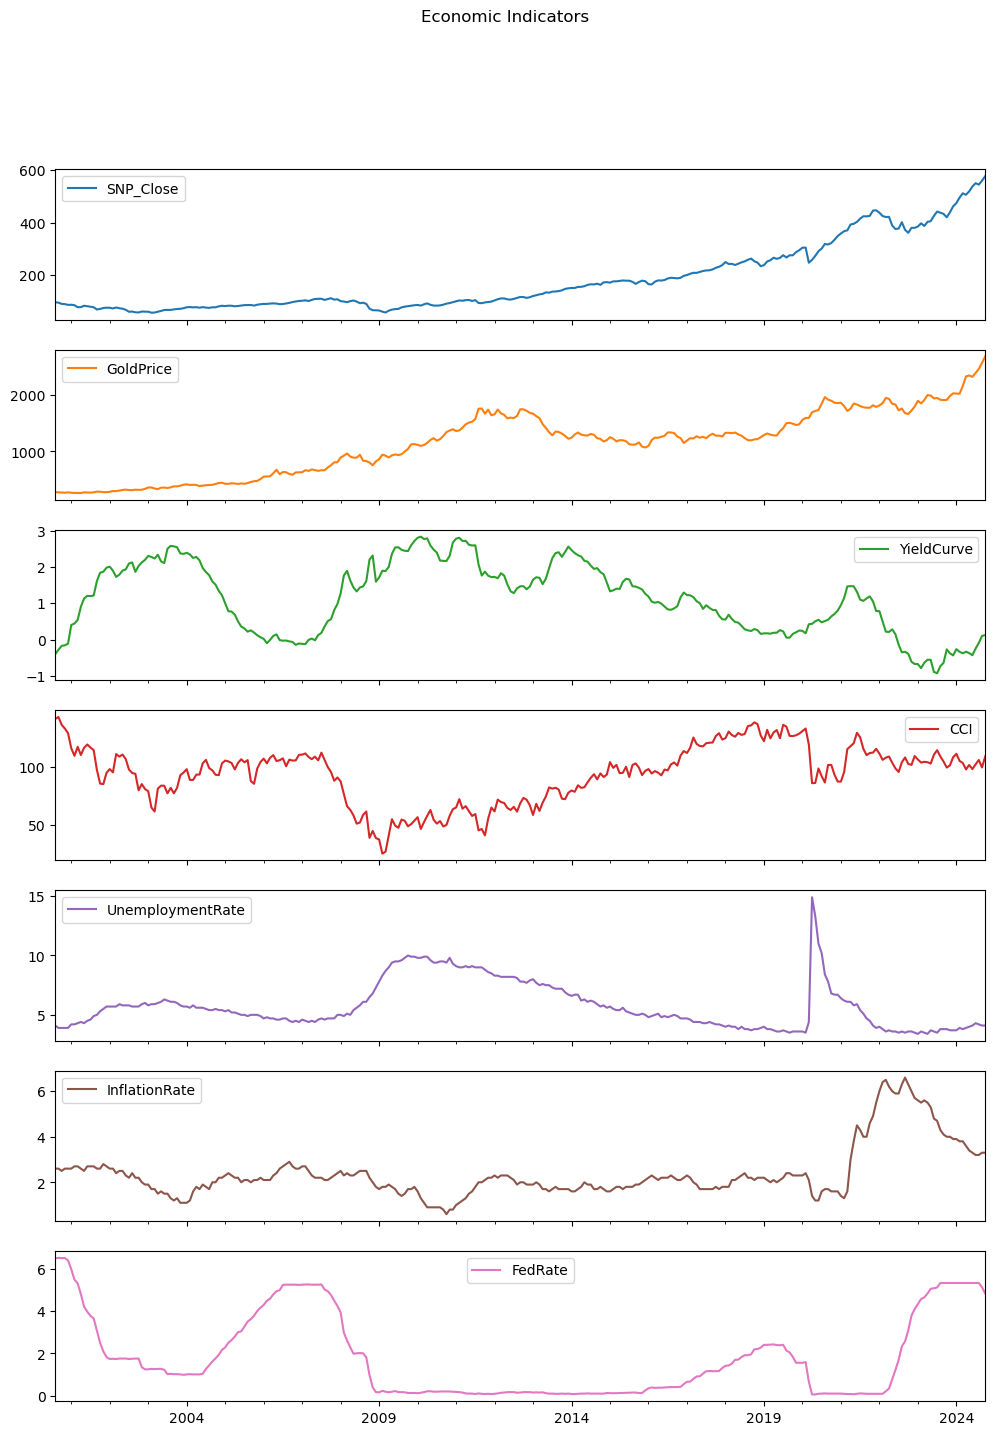

In [319]:
#plot the  indicators
economic_data_df.plot(subplots=True, figsize=(12, 16), title="Economic Indicators")

#savce the plot
plt.savefig("./graphs/EconomicIndicators.png")


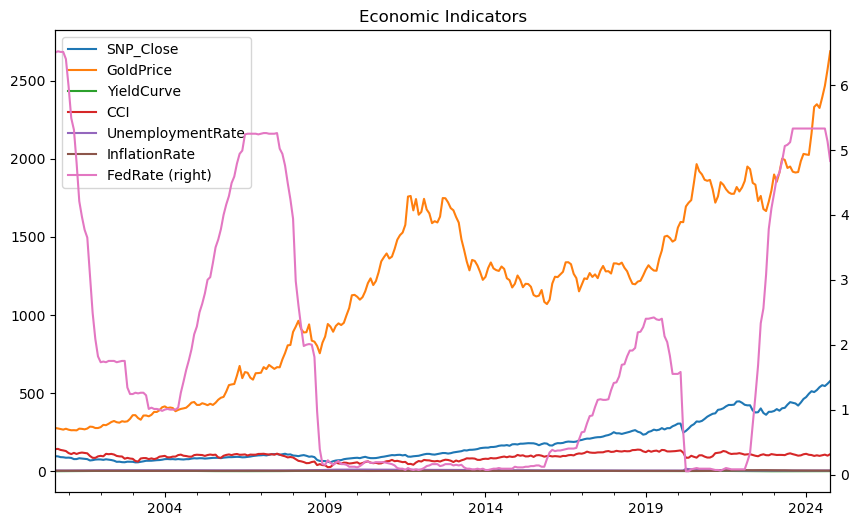

In [320]:
#plot the economic data dataframe to scale
economic_data_df.plot(secondary_y=['FedRate'], figsize=(10, 6), title="Economic Indicators")

#save the plot
plt.savefig("./graphs/economic_data.png")

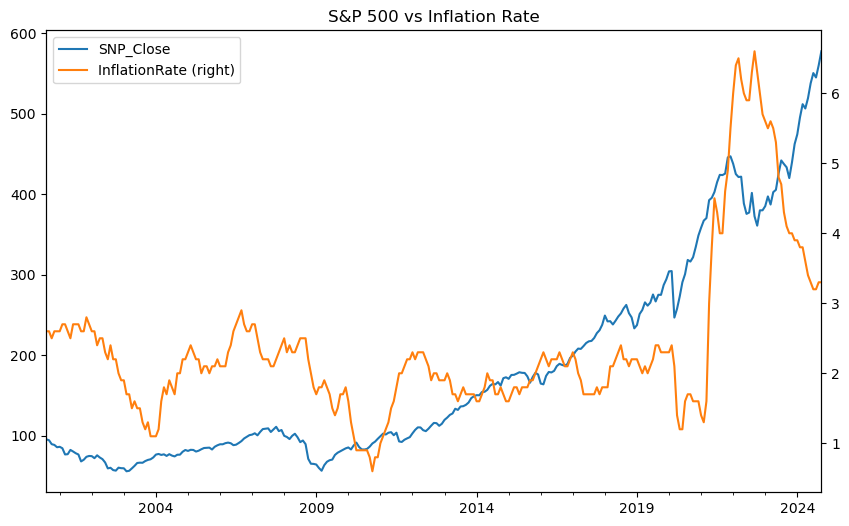

In [322]:
#plot SNP and inflation rate

economic_data_df[['SNP_Close', 'InflationRate']].plot(secondary_y=['InflationRate'], figsize=(10, 6), title="S&P 500 vs Inflation Rate")
#save the plot
plt.savefig("./graphs/SNPvsInflation.png")

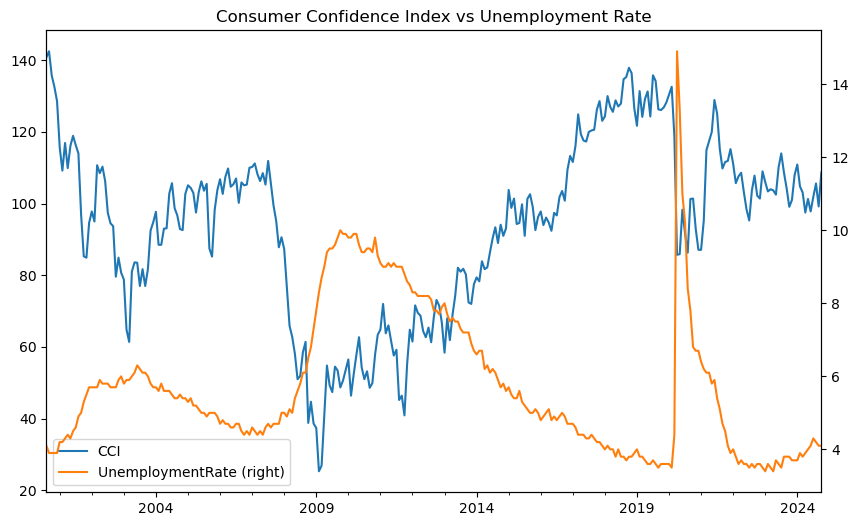

In [340]:
#plot CCI and unmeployment rate
economic_data_df[['CCI', 'UnemploymentRate']].plot(secondary_y=['UnemploymentRate'], figsize=(10, 6), title="Consumer Confidence Index vs Unemployment Rate")

#save the plot
plt.savefig("./graphs/CCIvsUnemployment.png")

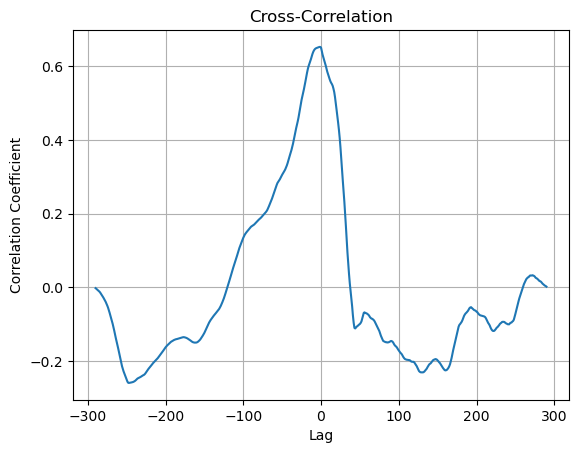

In [324]:
#plot the croos correlation between the SNP_Close and the InflationRate
x = economic_data_df['SNP_Close']
y = economic_data_df['InflationRate']

# Compute cross-correlation
cross_corr = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
lags = np.arange(-len(x) + 1, len(x))  # Lags associated with cross-correlation

# Normalize the cross-correlation
cross_corr /= (np.std(x) * np.std(y) * len(x))

# Plot the cross-correlation
plt.plot(lags, cross_corr)
plt.title("Cross-Correlation")
plt.grid()
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.show()

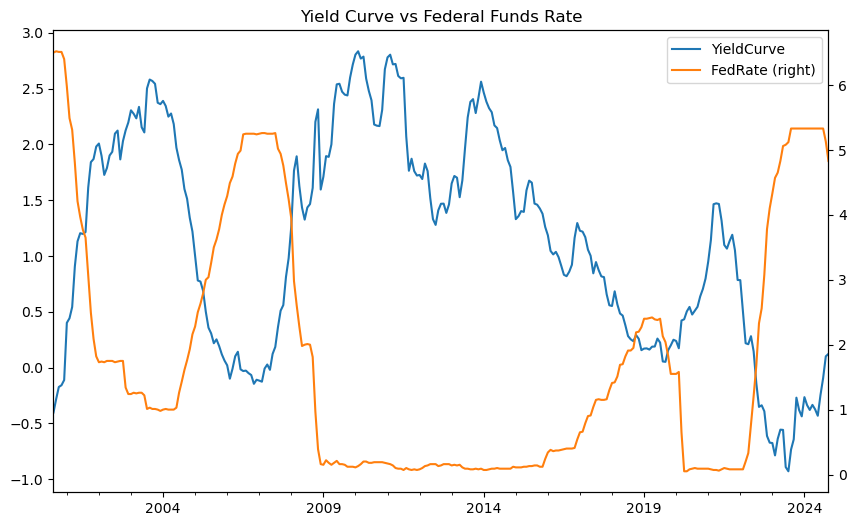

In [350]:
#plot the yield curve and fed rate
economic_data_df[['YieldCurve', 'FedRate']].plot(secondary_y=['FedRate'], figsize=(10, 6), title="Yield Curve vs Federal Funds Rate")
#save the plot
plt.savefig("./graphs/YieldCurvevsFedRate.png")

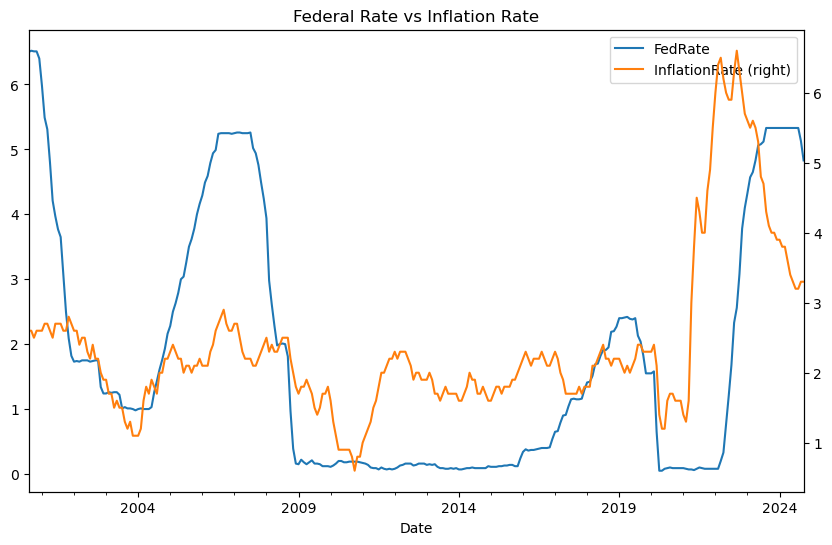

In [ ]:
#plot fed rate and inflation with title
 
economic_data_df[['FedRate', 'InflationRate']].plot(secondary_y=['InflationRate'], figsize=(10, 6), title="Federal Rate vs Inflation Rate")

#save the graph
plt.savefig("./graphs/FedRate_vs_InflationRate.png")


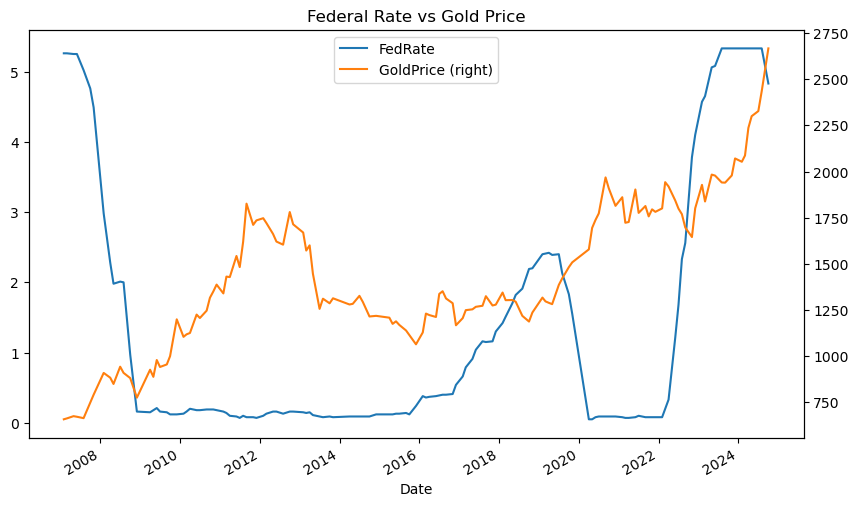

In [ ]:
#plot fed rate and gold prices
economic_data_df[['FedRate', 'GoldPrice']].plot(secondary_y=['GoldPrice'], figsize=(10, 6), title="Federal Rate vs Gold Price")
#save the plot
plt.savefig("./graphs/FedRate_GoldPrice.png")


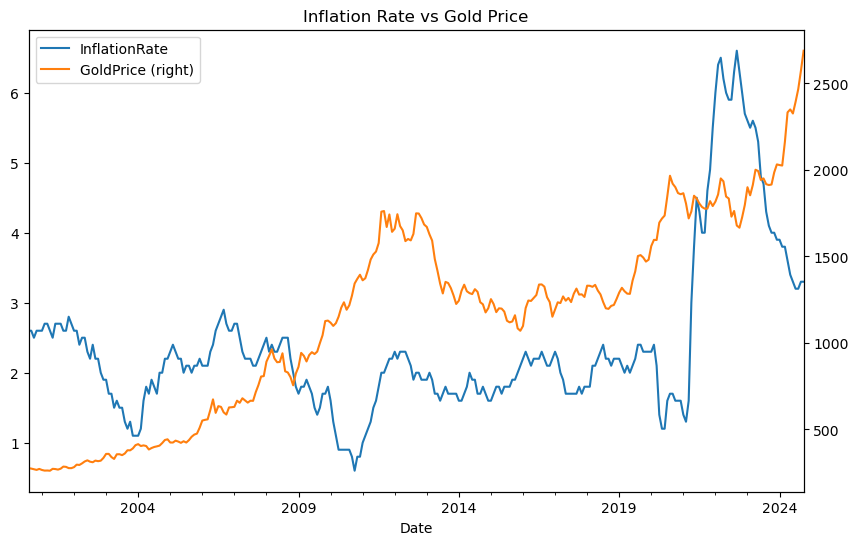

In [ ]:
#plot inflation rate and gold price
economic_data_df[['InflationRate', 'GoldPrice']].plot(secondary_y=['GoldPrice'], figsize=(10, 6), title ="Inflation Rate vs Gold Price")

#save the plot
plt.savefig("./graphs/InflationRate_GoldPrice.png")

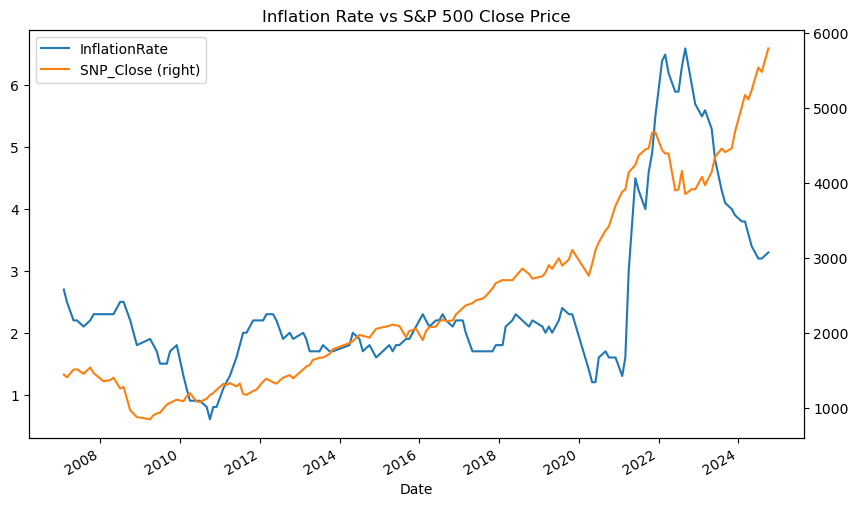

In [ ]:
#plot inflation rate and SNP_Close
economic_data_df[['InflationRate', 'SNP_Close']].plot(secondary_y=['SNP_Close'], figsize=(10, 6), title="Inflation Rate vs S&P 500 Close Price")

#save the plot
plt.savefig("./graphs/InflationRate_SNP_Close.png")


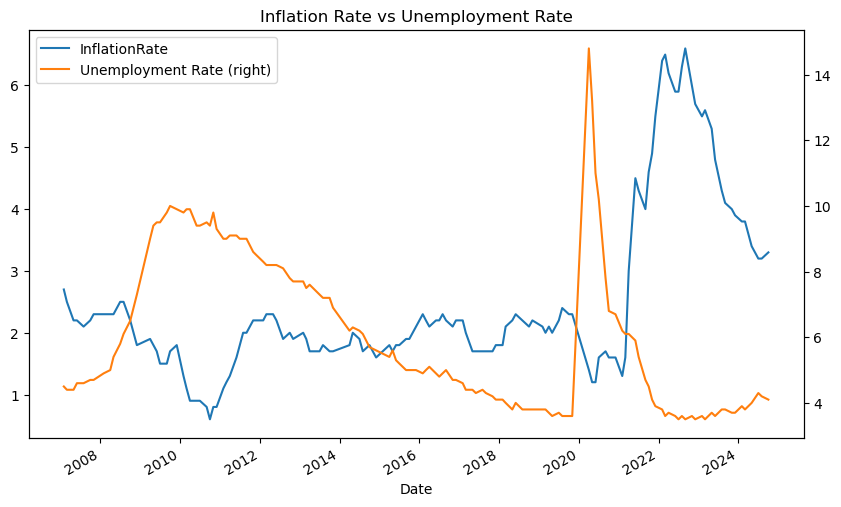

In [ ]:
#plot inflation rate and unemployment rate
economic_data_df[['InflationRate', 'Unemployment Rate']].plot(secondary_y=['Unemployment Rate'], figsize=(10, 6), title="Inflation Rate vs Unemployment Rate")

#save the plot
plt.savefig("./graphs/InflationRate_Unemployment.png")

In [341]:
#prep Unemployment data for prophet
#select date from 2007 onwards

Unemployment_P = Unemployment_monhtly_df.reset_index()
Unemployment_P = Unemployment_P.rename(columns={'Date':'ds', 'UnemploymentRate':'y'})
Unemployment_P.head()


,ds,y
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [342]:
# Sort the DataFrame by `ds` in ascending order
Unemployment_P = Unemployment_P.sort_values(by=["ds"], ascending=True)
#select only data from 2007  onwards

# Display sample data from head and tail
display(Unemployment_P.head(10))
display(Unemployment_P.tail(10))

,ds,y
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


,ds,y
912,2024-01-01,3.7
913,2024-02-01,3.9
914,2024-03-01,3.8
915,2024-04-01,3.9
916,2024-05-01,4.0
917,2024-06-01,4.1
918,2024-07-01,4.3
919,2024-08-01,4.2
920,2024-09-01,4.1
921,2024-10-01,4.1


In [343]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [344]:
#fit the model
model.fit(Unemployment_P)


16:17:03 - cmdstanpy - INFO - Chain [1] start processing
16:17:03 - cmdstanpy - INFO - Chain [1] done processing


In [345]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_unemployment = model.make_future_dataframe(periods=12, freq="ME")

# View the last five rows of the predictions
future_unemployment.tail()

,ds
929,2025-05-31
930,2025-06-30
931,2025-07-31
932,2025-08-31
933,2025-09-30


In [346]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_unemployment = model.predict(future_unemployment)

# Display the first five rows of the forecast DataFrame
forecast_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1948-01-01,4.169542,2.249515,5.801921,4.169542,4.169542,-0.078683,-0.078683,-0.078683,-0.078683,-0.078683,-0.078683,0.0,0.0,0.0,4.090859
1,1948-02-01,4.173764,2.319531,5.770937,4.173764,4.173764,-0.084521,-0.084521,-0.084521,-0.084521,-0.084521,-0.084521,0.0,0.0,0.0,4.089243
2,1948-03-01,4.177714,2.352217,5.696187,4.177714,4.177714,-0.187321,-0.187321,-0.187321,-0.187321,-0.187321,-0.187321,0.0,0.0,0.0,3.990393
3,1948-04-01,4.181936,2.648236,6.004188,4.181936,4.181936,0.193154,0.193154,0.193154,0.193154,0.193154,0.193154,0.0,0.0,0.0,4.375091
4,1948-05-01,4.186023,2.707632,6.014878,4.186023,4.186023,0.147564,0.147564,0.147564,0.147564,0.147564,0.147564,0.0,0.0,0.0,4.333587


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


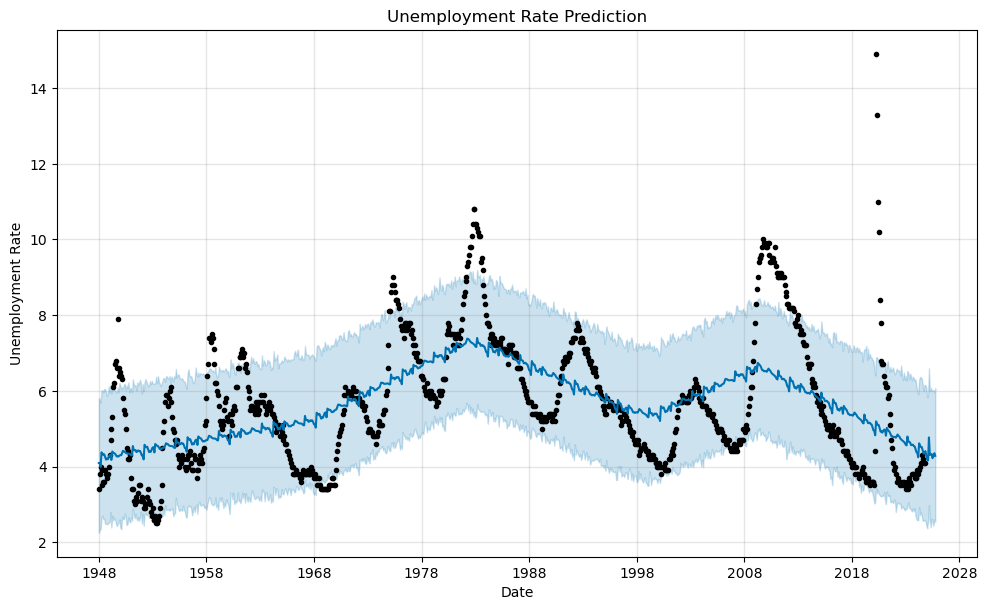

In [349]:
# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast_unemployment, xlabel="Date", ylabel="Unemployment Rate")
plt.title("Unemployment Rate Prediction")

#save the plot
plt.savefig("./graphs/Unemployment_Prediction.png")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

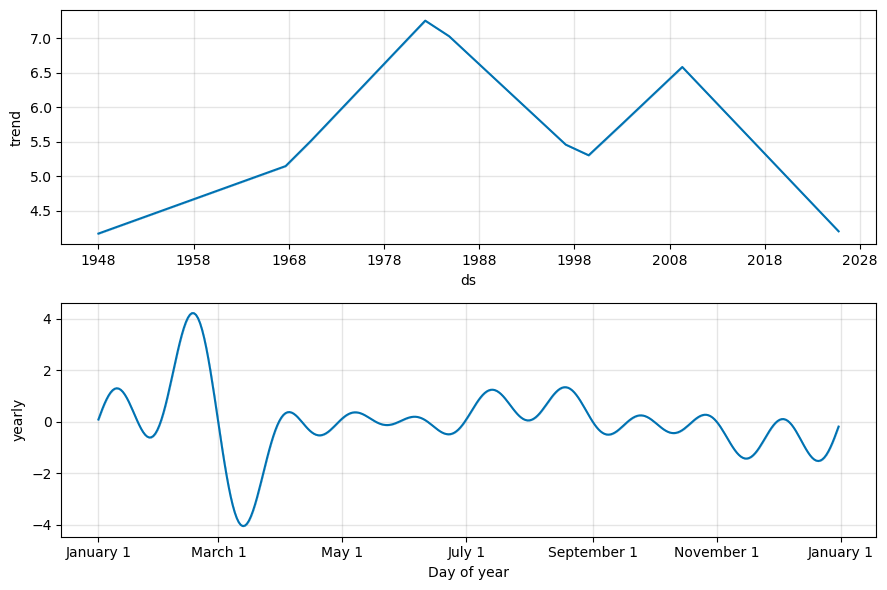

In [ ]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_unemployment)


#save the plot
plt.savefig("./graphs/Unemployment_Components.png")


In [325]:
#prep Unemployment data for prophet
Inflation_P = Inflation_monthly_df.reset_index()
Inflation_P.head()

,Date,InflationRate
0,1957-02-01,0.4
1,1957-03-01,0.3
2,1957-04-01,0.3
3,1957-05-01,0.0
4,1957-06-01,0.3


In [326]:
Inflation_P = Inflation_P.rename(columns={'Date':'ds', 'InflationRate':'y'})
Inflation_P.head()

,ds,y
0,1957-02-01,0.4
1,1957-03-01,0.3
2,1957-04-01,0.3
3,1957-05-01,0.0
4,1957-06-01,0.3


In [327]:
# Sort the DataFrame by `ds` in ascending order
Inflation_P = Inflation_P.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(Inflation_P.head(10))
display(Inflation_P.tail(10))

,ds,y
0,1957-02-01,0.4
1,1957-03-01,0.3
2,1957-04-01,0.3
3,1957-05-01,0.0
4,1957-06-01,0.3
5,1957-07-01,0.3
6,1957-08-01,0.0
7,1957-09-01,0.3
8,1957-10-01,0.3
9,1957-11-01,0.3


,ds,y
803,2024-01-01,3.9
804,2024-02-01,3.8
805,2024-03-01,3.8
806,2024-04-01,3.6
807,2024-05-01,3.4
808,2024-06-01,3.3
809,2024-07-01,3.2
810,2024-08-01,3.2
811,2024-09-01,3.3
812,2024-10-01,3.3


In [328]:
# Call the Prophet function, store as an object
inflation_model = Prophet()

In [329]:
# Fit the Prophet model.
inflation_model.fit(Inflation_P)

16:09:34 - cmdstanpy - INFO - Chain [1] start processing
16:09:34 - cmdstanpy - INFO - Chain [1] done processing


In [336]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_inflation = inflation_model.make_future_dataframe(periods=12, freq="M")

# View the last five rows of the predictions
future_inflation.tail()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
820,2025-05-31
821,2025-06-30
822,2025-07-31
823,2025-08-31
824,2025-09-30


In [337]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_inflation = inflation_model.predict(future_inflation)

# Display the first five rows of the forecast DataFrame
forecast_inflation.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1957-02-01,0.166695,-1.479263,2.015104,0.166695,0.166695,0.049559,0.049559,0.049559,0.049559,0.049559,0.049559,0.0,0.0,0.0,0.216254
1,1957-03-01,0.192518,-1.610345,1.976257,0.192518,0.192518,0.026435,0.026435,0.026435,0.026435,0.026435,0.026435,0.0,0.0,0.0,0.218953
2,1957-04-01,0.221108,-1.557040,1.954358,0.221108,0.221108,0.013183,0.013183,0.013183,0.013183,0.013183,0.013183,0.0,0.0,0.0,0.234291
3,1957-05-01,0.248775,-1.645043,2.093890,0.248775,0.248775,0.000564,0.000564,0.000564,0.000564,0.000564,0.000564,0.0,0.0,0.0,0.249339
4,1957-06-01,0.277365,-1.574514,1.976792,0.277365,0.277365,0.012652,0.012652,0.012652,0.012652,0.012652,0.012652,0.0,0.0,0.0,0.290016


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


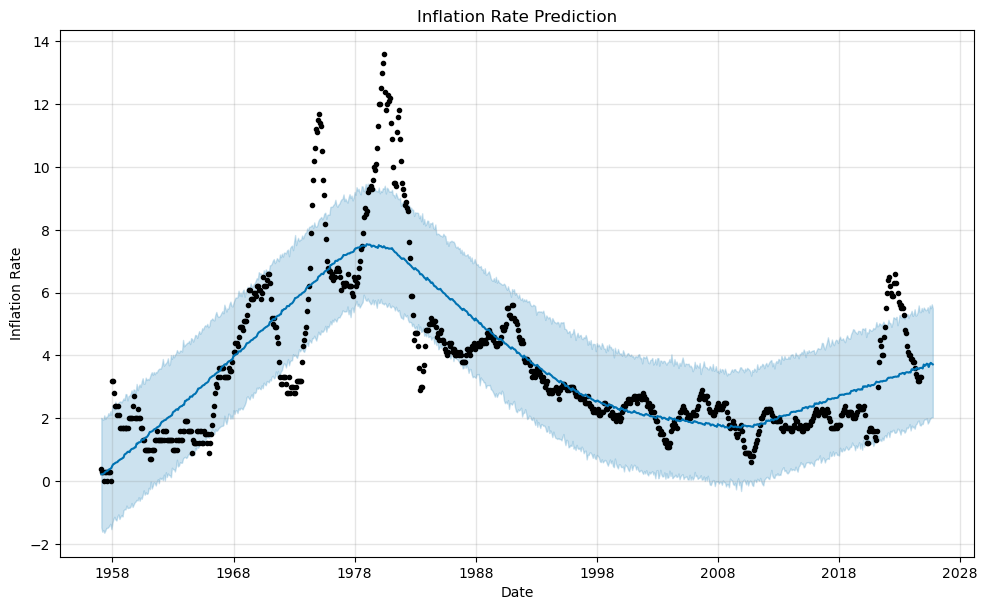

In [381]:
# Plot the Prophet predictions trends data
inflation_model.plot(forecast_inflation, xlabel="Date", ylabel="Inflation Rate")
plt.title("Inflation Rate Prediction")


#save the plot
plt.savefig("./graphs/Inflation_Prediction.png")


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

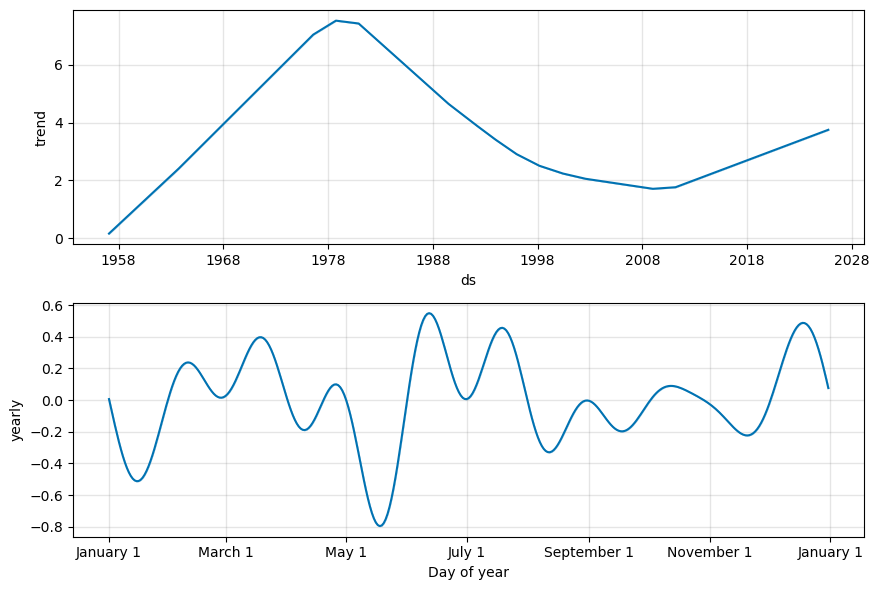

In [334]:
# Use the plot_components function to visualize the forecast results 
inflation_figures = inflation_model.plot_components(forecast_inflation) 

#save the plot
plt.savefig("./graphs/Inflation_Components.png")

In [351]:
#prep CCI data for prophet

CCI_P = CCI_monthly_df.reset_index()
CCI_P = CCI_P.rename(columns={'Date':'ds', 'CCI':'y'})
CCI_P.head()

,ds,y
0,1967-02-01,134.3
1,1967-04-01,140.7
2,1967-06-01,134.0
3,1967-08-01,130.1
4,1967-10-01,134.5


In [353]:
# Call the Prophet function, store as an object
CCI_model = Prophet()

#fit the model
CCI_model.fit(CCI_P)

16:38:16 - cmdstanpy - INFO - Chain [1] start processing
16:38:16 - cmdstanpy - INFO - Chain [1] done processing


In [354]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_CCI = CCI_model.make_future_dataframe(periods=12, freq="M")

# View the last five rows of the predictions
future_CCI.tail()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
638,2025-05-31
639,2025-06-30
640,2025-07-31
641,2025-08-31
642,2025-09-30


In [355]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_CCI = CCI_model.predict(future_inflation)

# Display the first five rows of the forecast DataFrame
forecast_CCI.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1957-02-01,108.053754,80.611912,135.029398,108.053754,108.053754,-0.498514,-0.498514,-0.498514,-0.498514,-0.498514,-0.498514,0.0,0.0,0.0,107.555240
1,1957-03-01,108.006623,79.148948,136.889282,108.006623,108.006623,-0.146190,-0.146190,-0.146190,-0.146190,-0.146190,-0.146190,0.0,0.0,0.0,107.860433
2,1957-04-01,107.954442,80.324766,137.384650,107.954442,107.954442,1.057893,1.057893,1.057893,1.057893,1.057893,1.057893,0.0,0.0,0.0,109.012336
3,1957-05-01,107.903945,80.099508,137.078023,107.903945,107.903945,0.734974,0.734974,0.734974,0.734974,0.734974,0.734974,0.0,0.0,0.0,108.638920
4,1957-06-01,107.851765,82.868562,136.836888,107.851765,107.851765,1.988686,1.988686,1.988686,1.988686,1.988686,1.988686,0.0,0.0,0.0,109.840451


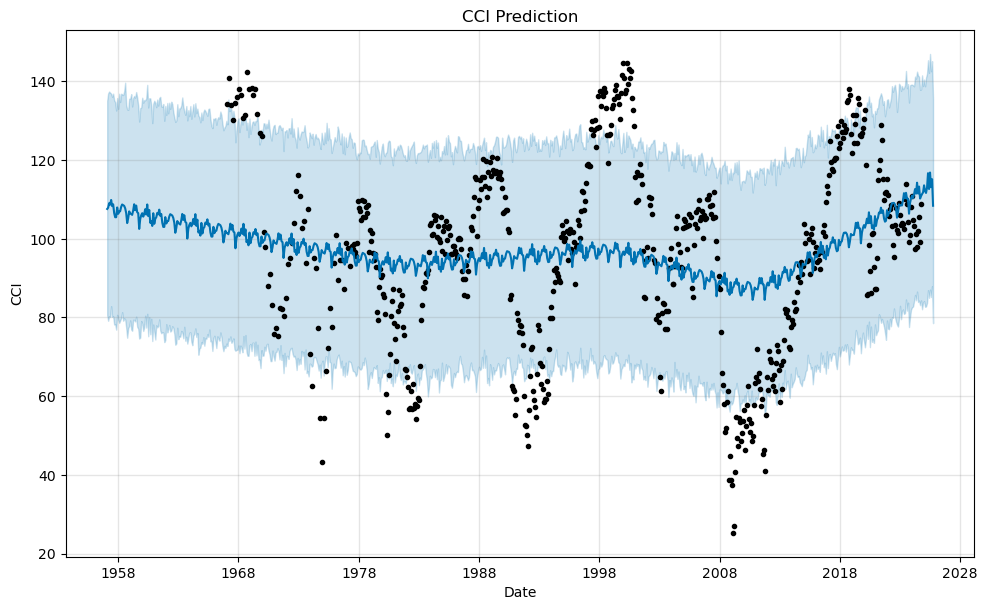

In [382]:
# Plot the Prophet predictions trends data
CCI_model.plot(forecast_CCI, xlabel="Date", ylabel="CCI")
plt.title("CCI Prediction")


#save the plot
plt.savefig("./graphs/CCI_Prediction.png")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

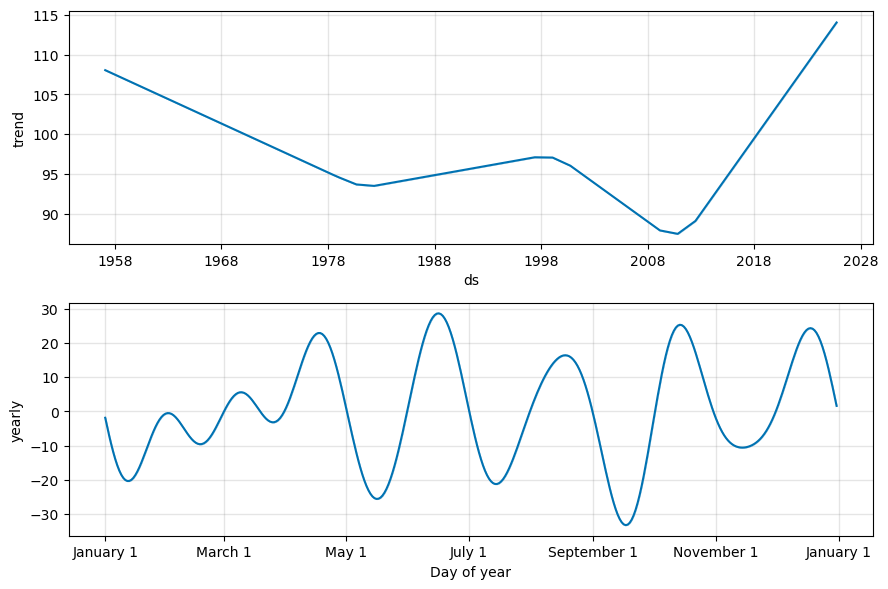

In [358]:
#plot the components
CCI_figures = CCI_model.plot_components(forecast_CCI)

#save the plot
plt.savefig("./graphs/CCI_Components.png")


In [373]:
#prep yield curve data for prophet
YieldCurve_P = YieldCurve_monthly_df.reset_index()
YieldCurve_P = YieldCurve_P.rename(columns={'Date':'ds', 'YieldCurve':'y'})
YieldCurve_P.head()

,ds,y
0,1980-02-01,-1.003684
1,1980-03-01,-2.135714
2,1980-04-01,-1.028571
3,1980-05-01,0.731429
4,1980-06-01,1.050000


In [374]:
# Call the Prophet function, store as an object
YieldCurve_model = Prophet()


In [375]:
#fit the model
YieldCurve_model.fit(YieldCurve_P)

16:46:18 - cmdstanpy - INFO - Chain [1] start processing
16:46:18 - cmdstanpy - INFO - Chain [1] done processing


In [376]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_YieldCurve = YieldCurve_model.make_future_dataframe(periods=12, freq="M")

# View the last five rows of the predictions
future_YieldCurve.tail()


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
545,2025-06-30
546,2025-07-31
547,2025-08-31
548,2025-09-30
549,2025-10-31


In [377]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_YieldCurve = YieldCurve_model.predict(future_YieldCurve)

# Display the first five rows of the forecast DataFrame
forecast_YieldCurve.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-02-01,0.384353,-0.653664,1.407787,0.384353,0.384353,-0.015811,-0.015811,-0.015811,-0.015811,-0.015811,-0.015811,0.0,0.0,0.0,0.368542
1,1980-03-01,0.387127,-0.712326,1.306134,0.387127,0.387127,-0.063308,-0.063308,-0.063308,-0.063308,-0.063308,-0.063308,0.0,0.0,0.0,0.323819
2,1980-04-01,0.390093,-0.606520,1.363881,0.390093,0.390093,-0.012943,-0.012943,-0.012943,-0.012943,-0.012943,-0.012943,0.0,0.0,0.0,0.377150
3,1980-05-01,0.392963,-0.603413,1.435004,0.392963,0.392963,0.018049,0.018049,0.018049,0.018049,0.018049,0.018049,0.0,0.0,0.0,0.411012
4,1980-06-01,0.395929,-0.617540,1.388345,0.395929,0.395929,-0.014736,-0.014736,-0.014736,-0.014736,-0.014736,-0.014736,0.0,0.0,0.0,0.381193


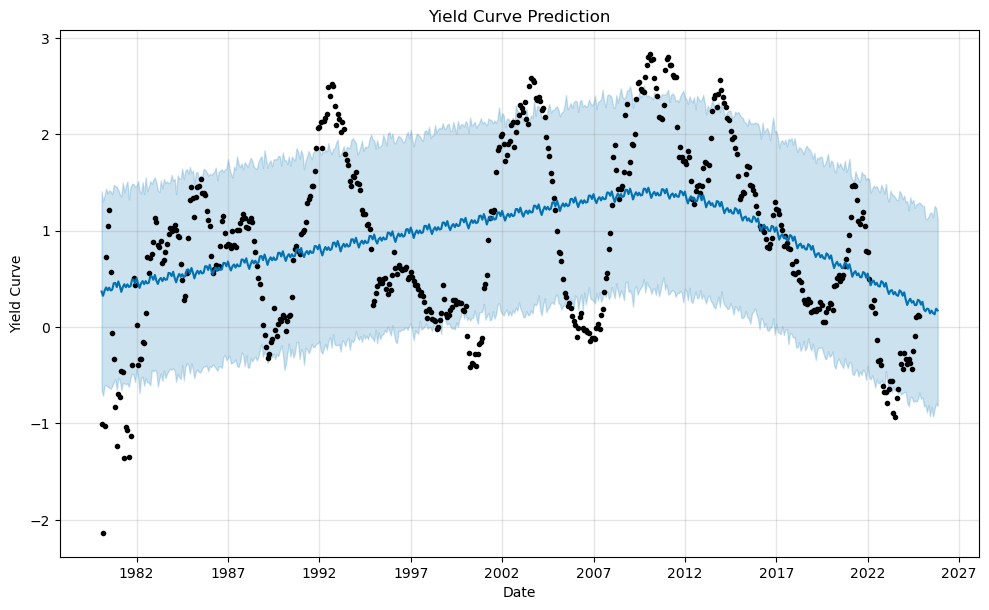

In [383]:
# Plot the Prophet predictions trends data
YieldCurve_model.plot(forecast_YieldCurve, xlabel="Date", ylabel="Yield Curve")
plt.title("Yield Curve Prediction")


#save the plot
plt.savefig("./graphs/YieldCurve_Prediction.png")


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

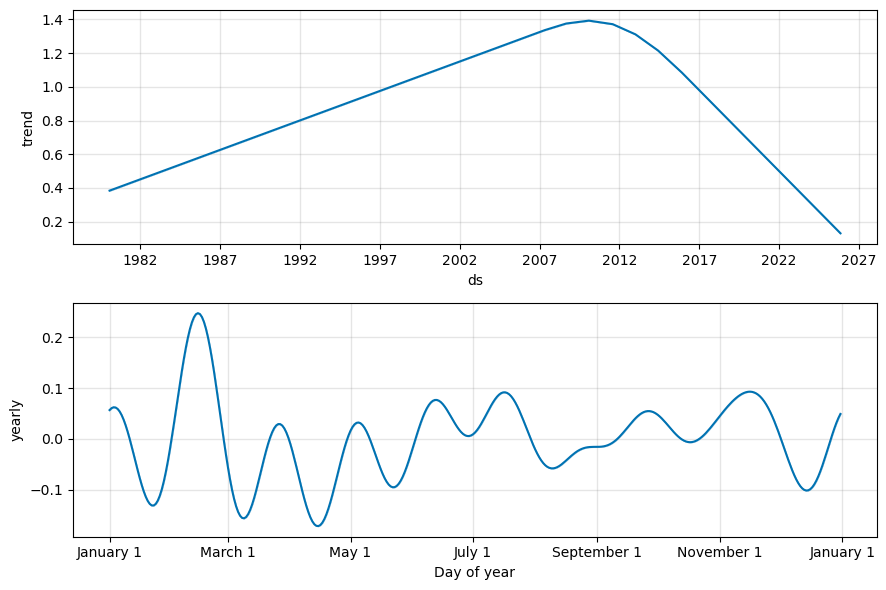

In [380]:
# Use the plot_components function to visualize the forecast results
YieldCurve_figures = YieldCurve_model.plot_components(forecast_YieldCurve)

#save the plot
plt.savefig("./graphs/YieldCurve_Components.png")


In [384]:
#perp FedRate data for prophet
FedRate_P = Fedfunds_monthly_df.reset_index()
FedRate_P = FedRate_P.rename(columns={'Date':'ds', 'FedRate':'y'})
FedRate_P.head()


,ds,y
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [385]:
# Call the Prophet function, store as an object
FedRate_model = Prophet()

#fit the model
FedRate_model.fit(FedRate_P)


16:57:33 - cmdstanpy - INFO - Chain [1] start processing
16:57:33 - cmdstanpy - INFO - Chain [1] done processing


In [386]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_FedRate = FedRate_model.make_future_dataframe(periods=12, freq="M")

# View the last five rows of the predictions
future_FedRate.tail()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
851,2025-05-31
852,2025-06-30
853,2025-07-31
854,2025-08-31
855,2025-09-30


In [387]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_FedRate = FedRate_model.predict(future_FedRate)


In [388]:
# Display the first five rows of the forecast DataFrame
forecast_FedRate.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1954-07-01,0.941714,-1.434554,3.469903,0.941714,0.941714,0.063361,0.063361,0.063361,0.063361,0.063361,0.063361,0.0,0.0,0.0,1.005075
1,1954-08-01,0.970036,-1.224731,3.667162,0.970036,0.970036,0.076051,0.076051,0.076051,0.076051,0.076051,0.076051,0.0,0.0,0.0,1.046087
2,1954-09-01,0.998358,-1.483940,3.454481,0.998358,0.998358,0.073995,0.073995,0.073995,0.073995,0.073995,0.073995,0.0,0.0,0.0,1.072353
3,1954-10-01,1.025767,-1.573965,3.598367,1.025767,1.025767,0.055794,0.055794,0.055794,0.055794,0.055794,0.055794,0.0,0.0,0.0,1.081561
4,1954-11-01,1.054089,-1.400670,3.335802,1.054089,1.054089,-0.012261,-0.012261,-0.012261,-0.012261,-0.012261,-0.012261,0.0,0.0,0.0,1.041827


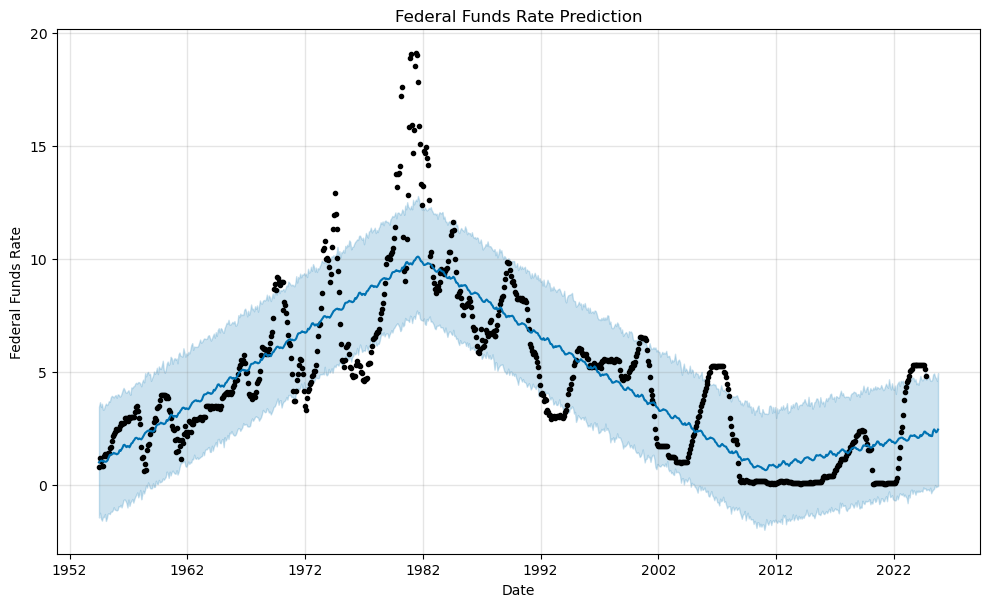

In [390]:
# Plot the Prophet predictions trends data
FedRate_model.plot(forecast_FedRate, xlabel="Date", ylabel="Federal Funds Rate")
plt.title("Federal Funds Rate Prediction")

#save the plot
plt.savefig("./graphs/FedRate_Prediction.png")


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

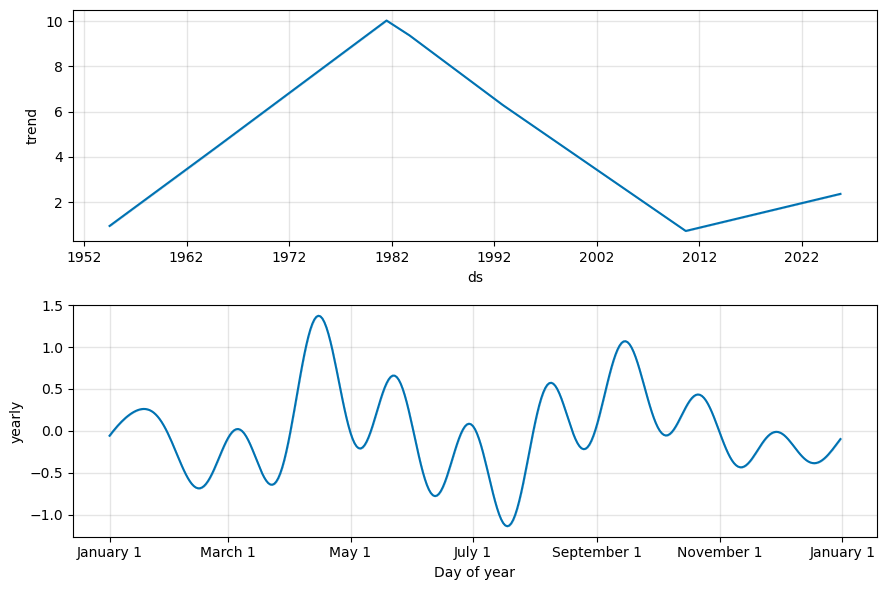

In [391]:
# Use the plot_components function to visualize the forecast results
FedRate_figures = FedRate_model.plot_components(forecast_FedRate)

#save the plot
plt.savefig("./graphs/FedRate_Components.png")

In [392]:
#prep SNP data for prophet 
SNP_P = SNP_monthly_df.reset_index()
SNP_P = SNP_P.rename(columns={'Date':'ds', 'SNP_Close':'y'})
SNP_P.head()


,ds,y
0,1993-01-01,24.608622
1,1993-02-01,24.806675
2,1993-03-01,25.317268
3,1993-04-01,24.960989
4,1993-05-01,25.132823


In [393]:
# Call the Prophet function, store as an object
SNP_model = Prophet()

#fit the model
SNP_model.fit(SNP_P)


17:09:51 - cmdstanpy - INFO - Chain [1] start processing
17:09:51 - cmdstanpy - INFO - Chain [1] done processing


In [394]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_SNP = SNP_model.make_future_dataframe(periods=12, freq="M")

# View the last five rows of the predictions
future_SNP.tail()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
390,2025-06-30
391,2025-07-31
392,2025-08-31
393,2025-09-30
394,2025-10-31


In [395]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_SNP = SNP_model.predict(future_SNP)

# Display the first five rows of the forecast DataFrame
forecast_SNP.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1993-01-01,16.581932,-6.064090,41.173767,16.581932,16.581932,0.831677,0.831677,0.831677,0.831677,0.831677,0.831677,0.0,0.0,0.0,17.413609
1,1993-02-01,17.323649,-4.428170,41.914902,17.323649,17.323649,1.029781,1.029781,1.029781,1.029781,1.029781,1.029781,0.0,0.0,0.0,18.353430
2,1993-03-01,17.993587,-5.184249,40.444796,17.993587,17.993587,-0.874646,-0.874646,-0.874646,-0.874646,-0.874646,-0.874646,0.0,0.0,0.0,17.118941
3,1993-04-01,18.735304,-3.456939,40.474657,18.735304,18.735304,0.140074,0.140074,0.140074,0.140074,0.140074,0.140074,0.0,0.0,0.0,18.875378
4,1993-05-01,19.453095,-4.959859,42.857350,19.453095,19.453095,-0.005805,-0.005805,-0.005805,-0.005805,-0.005805,-0.005805,0.0,0.0,0.0,19.447290


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


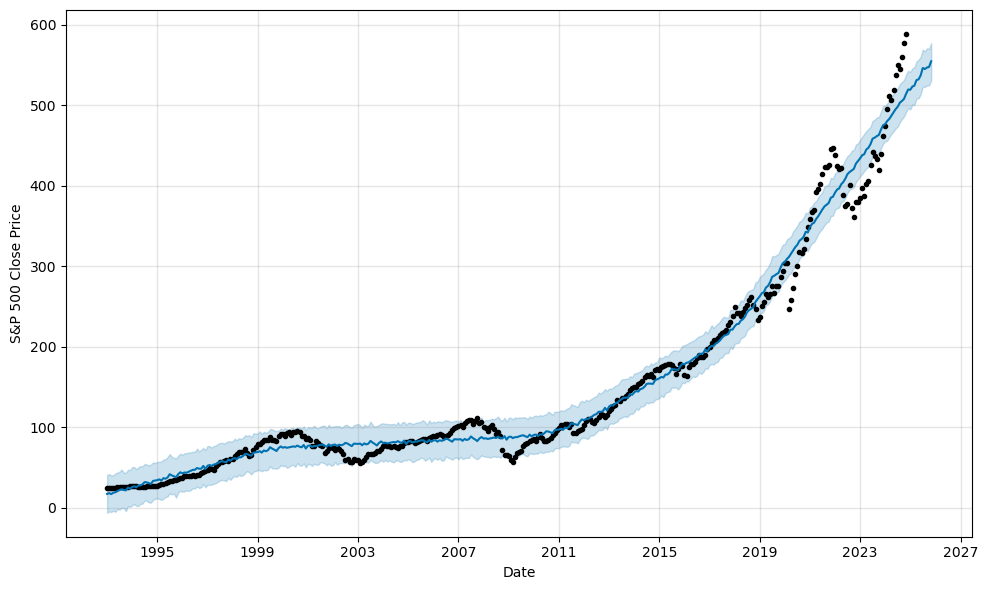

In [396]:
# Plot the Prophet predictions trends data
SNP_model.plot(forecast_SNP, xlabel="Date", ylabel="S&P 500 Close Price")

#save the plot
plt.savefig("./graphs/SNP_Prediction.png")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

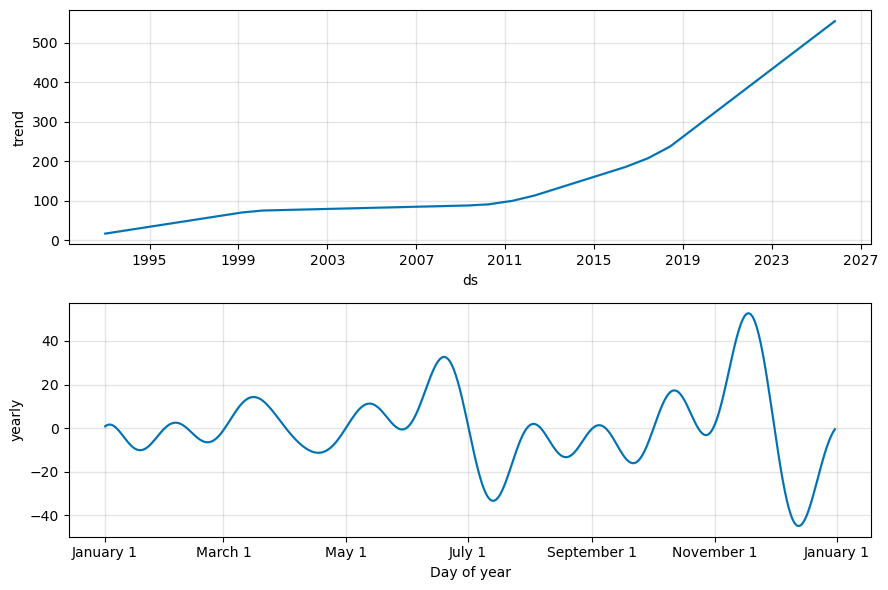

In [397]:
# Use the plot_components function to visualize the forecast results
SNP_figures = SNP_model.plot_components(forecast_SNP)

#save the plot
plt.savefig("./graphs/SNP_Components.png")